In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
df = pd.read_excel("Oil well.xlsx")
df.head()

,Oil well operation parameters (2013 - 2021 y). Well № 807,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date,\nOil volume (m3/day),Volume of liquid (m3/day),\nGas volume (m3/day),Water volume (m3/day),Water cut (%),\nWorking hours,\nDynamic level (m),\nReservoir pressure (atm)
2,2013-01-01 00:00:00,49,70,13055,21,29,24,1819,214
3,2013-01-02 00:00:00,49,70,13055,21,29,24,1836,214
4,2013-01-03 00:00:00,49,70,13055,21,29,24,1788,214


In [3]:
# changing the name of columns
df.columns = ['date', 'oil_volume', 'liquid_volume', 'gas_volume', 'water_volume', 'water_cut', 'working_hours', 'dynamic_level', 'reservoir_pressure']

In [4]:
# dropping unnecessary rows
df = df.drop(index=[0,1], axis=0).reset_index(drop=True)

In [5]:
# df ---> csv
df.to_csv('oil_production.csv', index=False)

## data 
print(df.shape)
df

(2939, 9)


,date,oil_volume,liquid_volume,gas_volume,water_volume,water_cut,working_hours,dynamic_level,reservoir_pressure
0,2013-01-01 00:00:00,49,70,13055,21,29,24,1819,214
1,2013-01-02 00:00:00,49,70,13055,21,29,24,1836,214
2,2013-01-03 00:00:00,49,70,13055,21,29,24,1788,214
3,2013-01-04 00:00:00,49,70,13055,21,29,24,1789,214
4,2013-01-05 00:00:00,44,70,11768,26,36,24,1825,214
...,...,...,...,...,...,...,...,...,...
2934,2021-01-14 00:00:00,6,20,1593,15,70,16,2101,100
2935,2021-01-15 00:00:00,6,20,1593,15,70,16,2113,100
2936,2021-01-16 00:00:00,6,20,1583,14,70,16,2125,100
2937,2021-01-17 00:00:00,6,20,1573,14,70,16,2125,100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939 entries, 0 to 2938
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date                2939 non-null   object
 1   oil_volume          2939 non-null   object
 2   liquid_volume       2939 non-null   object
 3   gas_volume          2939 non-null   object
 4   water_volume        2939 non-null   object
 5   water_cut           2939 non-null   object
 6   working_hours       2939 non-null   object
 7   dynamic_level       2939 non-null   object
 8   reservoir_pressure  2939 non-null   object
dtypes: object(9)
memory usage: 206.8+ KB


In [6]:
# required_dataframe
df = df[['date','oil_volume']]

In [7]:
# changing the data type of columns
df['date'] = pd.to_datetime(df['date'])
df['oil_volume'] = df['oil_volume'].astype(np.float64)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939 entries, 0 to 2938
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2939 non-null   datetime64[ns]
 1   oil_volume  2939 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 46.1 KB


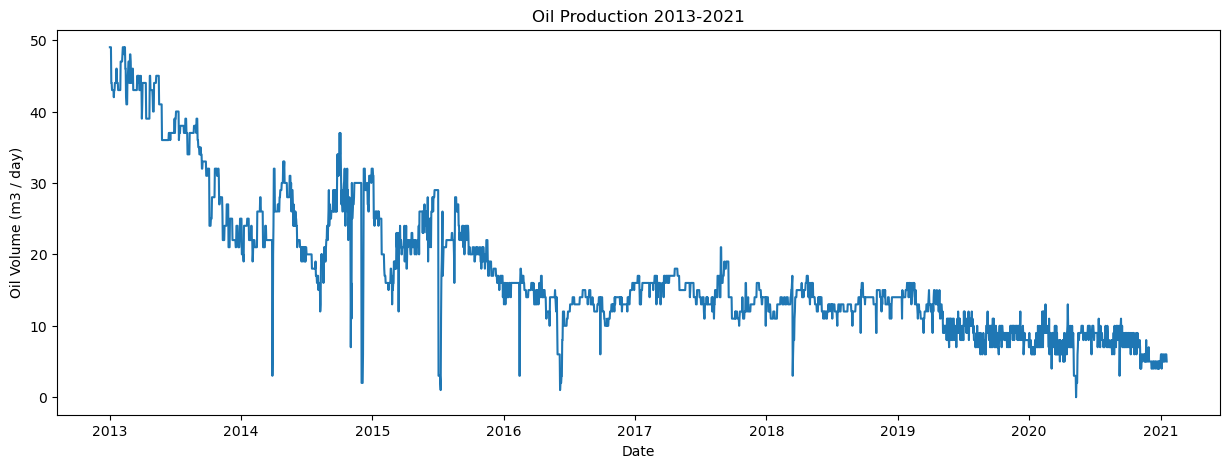

In [10]:
plt.figure(figsize=(15,5))

sns.lineplot(x=df['date'], y=df['oil_volume'])
plt.title('Oil Production 2013-2021')
plt.xlabel('Date')
plt.ylabel('Oil Volume (m3 / day)')
plt.show()

### Data Preprocessing -- 

In [11]:
# Extracting 'date', 'month', 'day' from 'date'

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df.head()

,date,oil_volume,year,month,day
0,2013-01-01,49.0,2013,1,1
1,2013-01-02,49.0,2013,1,2
2,2013-01-03,49.0,2013,1,3
3,2013-01-04,49.0,2013,1,4
4,2013-01-05,44.0,2013,1,5


**Train Test Split :**

In [12]:
# creating lag features for better prediction

df['lag_1'] = df['oil_volume'].shift(1)
df['lag_2'] = df['oil_volume'].shift(2)

df.dropna(inplace=True)

In [15]:
X = df[['year', 'month', 'day', 'lag_1', 'lag_2']]
y = df['oil_volume']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [16]:
df.head()

,date,oil_volume,year,month,day,lag_1,lag_2
2,2013-01-03,49.0,2013,1,3,49.0,49.0
3,2013-01-04,49.0,2013,1,4,49.0,49.0
4,2013-01-05,44.0,2013,1,5,49.0,49.0
5,2013-01-06,44.0,2013,1,6,44.0,49.0
6,2013-01-07,43.0,2013,1,7,44.0,44.0


### Model Training :

**Random Forest --**

In [17]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
y_pred = rf.predict(X_test)
print(f'r2 score : {r2_score(y_test, y_pred)}')
print(f'absolute error : {mean_absolute_error(y_test, y_pred)}')

r2 score : 0.9715624984991413
absolute error : 1.011530612244898


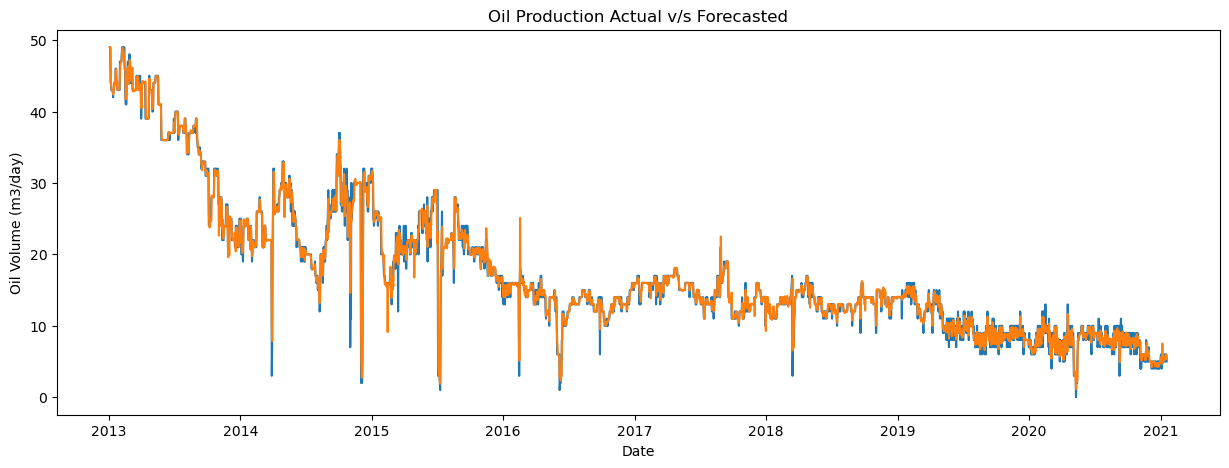

In [22]:
plt.figure(figsize=(15,5))

sns.lineplot(x=df['date'], y=df['oil_volume'])
sns.lineplot(x=df['date'], y=rf.predict(X))
plt.title('Oil Production Actual v/s Forecasted')
plt.xlabel('Date')
plt.ylabel('Oil Volume (m3/day)')
plt.show()

**XGBoost --**

In [23]:
xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [24]:
y_pred = xgb.predict(X_test)
print(f'r2 score : {r2_score(y_test, y_pred)}')
print(f'absolute error : {mean_absolute_error(y_test, y_pred)}')

r2 score : 0.9714741505137254
absolute error : 1.0510170688839997


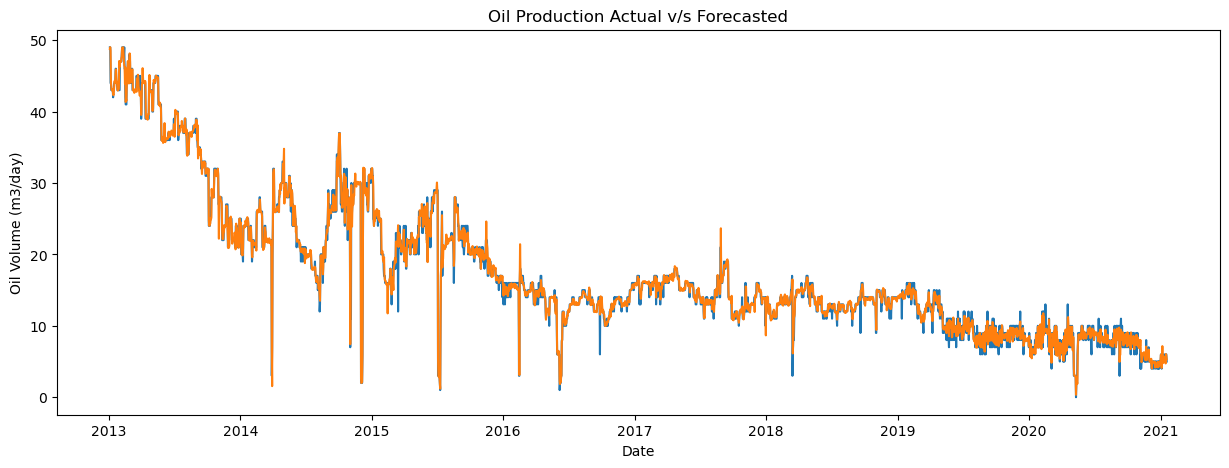

In [25]:
plt.figure(figsize=(15,5))

sns.lineplot(x=df['date'], y=df['oil_volume'])
sns.lineplot(x=df['date'], y=xgb.predict(X))
plt.title('Oil Production Actual v/s Forecasted')
plt.xlabel('Date')
plt.ylabel('Oil Volume (m3/day)')
plt.show()